# Note cho notebook:

Ngôn ngữ trình bày: tiếng anh

Tóm tắt nội dung chính:
- làm code mẫu, áp dụng quy tắc chấm điểm của ipip (https://ipip.ori.org/newScoringInstructions.htm)
- Sử dụng dataset https://raw.githubusercontent.com/automoto/big-five-data/master/big_five_scores.csv. sau một vài phân tích thăm dò đơn giản thì em quyết định train toàn bộ dataset, không phân biệt các nước, vì giá trị trung vị của từng loại tính cách mặc dù có lệch, nhưng nó phản ánh su hướng chung của tính cách. các cột điểm tính cách đều sạch, không bị thiếu nhãn giá trị.
- quá trình training sử dụng sklearn.decomposition.PCA
- gọi tên model là pca_evaluator
- kết quả cuối cùng là một file tensorflowlite để ứng dụng React Native có thể sử dụng.
- thuật toán so sánh hai giá trị PCA là hàm cosine_similarity (sklearn.metrics.pairwise import cosine_similarity). thuật toán so sánh không nằm trong quy trình của model mà trong tương lai sẽ được database server thực hiện
- Để test model, trong notebook có mục Interactive test
- Phần Objective là nội dung mà em thống nhất với Product Owner.

**note**
- Model không cần biết nội dung câu hỏi, mà chỉ quan tâm kết quả cuối cùng của 5 thang điểm tính cách trong khoảng giá trị từ 0-1
- nội dung câu hỏi và code để tổng hợp điểm sẽ được ứng dụng mobile chạy
- mục đích ban đầu khi tạo ra model thay vì sử dụng code thuần trên source code là vì kể cả khi hacker truy ngược được source code từ APK, thì họ vẫn không thể truy ngược lại thuật toán biển đổi. Tuy nhiên với cách làm hiện tại, khi sử dụng file tensorflow lite, thì hacker vẫn truy được thuật toán của file tensorflow lite.
- Nghĩa là source code của app an toàn chừng nào thì thuật toán của model cũng an toàn chừng đấy,không có kỹ thuật bảo mật nâng cao nào hơn. tuy nhiên vẫn đảm bảo được dữ liệu người dùng.   
- Một cách để exploit thuật toán biến đổi để reverse engineer thuật toán là họ cần tìm giá trị trung vị của PCA cho từng kết quả trắc nghiệm tính cách. Tuy nhiên thì giá trị của PCA được lưu trên cloud database của Supabase, và kết quả thực của trắc nghiệm tính cách (chưa được transform) thì lại càng không được database lưu.

**những điểm cần xem xét**
- có nên sử dụng PCA 4 chiều thay vì PCA 2 chiều không. vì PCA 2 chiều chỉ đại diện 60% giá trị ban đầu của kết quả, trong khi PCA 4 chiều đại diện 90% giá trị. Bảo toàn 100% giá trị theo như em tìm hiểu thì PCA không thể làm được, và giữ nguyên giá trị 5 chiều thì sẽ ảnh hưởng đến vấn đề quyền riêng tư.
- PCA transformation của model không áp dụng thuật toán ngẫu nhiên, nên với mỗi kết quả trắc nghiệm, model sẽ đưa ra giá trị duy nhất cho kết quả đó mà không có biến số nào chen vào.

**hướng phát triển cho tuần sau**
- (nếu không thay đổi cấu hình của model,) prototype của App sẽ áp dụng tensorflow model và đẩy data lên supabase


# Objective:
Turn results from a big 5 personality quiz into transformable/comparable/quantitable vectors  or any better data type so that other applications can use it to match one user's personality to the other (using the percentile system, for example: you are 92% compatible with this other person).

The final result should be an efficient and accurate tflite model so that other applications can reuse and do the calculations from a list of question list. note that the input should just be: reponse(1 to 5) and directions (which architype and directions of the question is the user answering to). in turn. the model will: return the data values that we will now call "personality fingerprint). This model is called pca_evaluator.

note that since we have 5 architype, we can create another model that does the aggrigation for the list of final answers that user have made. this model is called factor_aggrigator. the value that this model returns should be like an array or vectors that can tell the user's personality on each of the scales. this can be used for a 5-dimensions spider graph.

## Question list:

Source: https://ipip.ori.org/new_ipip-50-item-scale.htm


Questions (in csv format):
```
Item_Number,Question,Scale,Direction,Factor_Name
1,Am the life of the party.,1,+,Extraversion
2,Feel little concern for others.,2,-,Agreeableness
3,Am always prepared.,3,+,Conscientiousness
4,Get stressed out easily.,4,-,Emotional Stability
5,Have a rich vocabulary.,5,+,Intellect/Imagination
6,Don't talk a lot.,1,-,Extraversion
7,Am interested in people.,2,+,Agreeableness
8,Leave my belongings around.,3,-,Conscientiousness
9,Am relaxed most of the time.,4,+,Emotional Stability
10,Have difficulty understanding abstract ideas.,5,-,Intellect/Imagination
11,Feel comfortable around people.,1,+,Extraversion
12,Insult people.,2,-,Agreeableness
13,Pay attention to details.,3,+,Conscientiousness
14,Worry about things.,4,-,Emotional Stability
15,Have a vivid imagination.,5,+,Intellect/Imagination
16,Keep in the background.,1,-,Extraversion
17,Sympathize with others' feelings.,2,+,Agreeableness
18,Make a mess of things.,3,-,Conscientiousness
19,Seldom feel blue.,4,+,Emotional Stability
20,Am not interested in abstract ideas.,5,-,Intellect/Imagination
21,Start conversations.,1,+,Extraversion
22,Am not interested in other people's problems.,2,-,Agreeableness
23,Get chores done right away.,3,+,Conscientiousness
24,Am easily disturbed.,4,-,Emotional Stability
25,Have excellent ideas.,5,+,Intellect/Imagination
26,Have little to say.,1,-,Extraversion
27,Have a soft heart.,2,+,Agreeableness
28,Often forget to put things back in their proper place.,3,-,Conscientiousness
29,Get upset easily.,4,-,Emotional Stability
30,Do not have a good imagination.,5,-,Intellect/Imagination
31,Talk to a lot of different people at parties.,1,+,Extraversion
32,Am not really interested in others.,2,-,Agreeableness
33,Like order.,3,+,Conscientiousness
34,Change my mood a lot.,4,-,Emotional Stability
35,Am quick to understand things.,5,+,Intellect/Imagination
36,Don't like to draw attention to myself.,1,-,Extraversion
37,Take time out for others.,2,+,Agreeableness
38,Shirk my duties.,3,-,Conscientiousness
39,Have frequent mood swings.,4,-,Emotional Stability
40,Use difficult words.,5,+,Intellect/Imagination
41,Don't mind being the center of attention.,1,+,Extraversion
42,Feel others' emotions.,2,+,Agreeableness
43,Follow a schedule.,3,+,Conscientiousness
44,Get irritated easily.,4,-,Emotional Stability
45,Spend time reflecting on things.,5,+,Intellect/Imagination
46,Am quiet around strangers.,1,-,Extraversion
47,Make people feel at ease.,2,+,Agreeableness
48,Am exacting in my work.,3,+,Conscientiousness
49,Often feel blue.,4,-,Emotional Stability
50,Am full of ideas.,5,+,Intellect/Imagination
```
## Columns explainations:

Note. These five scales were developed to measure the Big-Five factor markers reported in the following article: Goldberg, L. R. (1992). The development of markers for the Big-Five factor structure. Psychological Assessment, 4, 26-42.

The numbers in scale column indicate the scale on which that item is scored (i.e., of the five factors: (1) Extraversion, (2) Agreeableness, (3) Conscientiousness, (4) Emotional Stability, or (5) Intellect/Imagination). the direction column (+ or -) indicate how would the total point of each scale adds up. These numbers should not be included in the actual survey questionnaire.

## Scoring explaination:

Here is how to score IPIP scales:

For + keyed items, the response "Very Inaccurate" is assigned a value of 1, "Moderately Inaccurate" a value of 2, "Neither Inaccurate nor Accurate" a 3, "Moderately Accurate" a 4, and "Very Accurate" a value of 5.

For - keyed items, the response "Very Inaccurate" is assigned a value of 5, "Moderately Inaccurate" a value of 4, "Neither Inaccurate nor Accurate" a 3, "Moderately Accurate" a 2, and "Very Accurate" a value of 1.

Once numbers are assigned for all of the items in the scale, just sum all the values to obtain a total scale score.

## factor explaination

### Factor 1

Factor I was labelled as Extroversion by the developers of the IPIP-BFFM. Factor I is sometimes given other names, such as Surgency or Positive Emotionality.

Extraversion is typically characterized by an individual's tendency to seek out social interaction and stimulation, as well as their level of enthusiasm and assertiveness in social situations. Individuals who score high on this dimension tend to be outgoing, sociable, and talkative. They enjoy being around others and seek out social situations. They are often described as having a high level of energy, enthusiasm, and assertiveness. They may also be more likely to engage in risk-taking behaviors, such as partying, drinking, or other forms of excitement-seeking.

In contrast, individuals who score low on extraversion are more introverted and reserved. They may prefer to spend time alone or in small groups, and may feel uncomfortable in large social gatherings. They may also be less assertive and more cautious in their interactions with others.

Research has shown that extraversion is linked to a range of outcomes, including job performance, social support, and well-being. For example, individuals who score high on extraversion tend to be more successful in careers that involve social interaction and communication. They may also have more social support networks and experience higher levels of subjective well-being.

### Factor 2

Factor II was labeled as Emotional Stability by the developers of the IPIP-BFFM. Factor II is often referred to by its low end, Neuroticism.

Individuals who score high on emotional stability are characterized as being emotionally resilient, calm, and even-tempered. They tend to experience fewer negative emotions and are better able to cope with stress and adversity. They are also more likely to exhibit positive emotions, such as happiness, contentment, and enthusiasm.

In contrast, individuals who score low on emotional stability tend to be more prone to negative emotions, such as anxiety, depression, and anger. They may be more reactive to stress and may find it difficult to cope with challenging situations. They may also exhibit a range of maladaptive behaviors, such as substance abuse or self-harm.

Research has shown that emotional stability is linked to a range of outcomes, including mental health, physical health, and interpersonal relationships. For example, individuals who score high on emotional stability tend to have better mental health outcomes, such as lower rates of depression and anxiety. They may also have better physical health outcomes, such as lower rates of cardiovascular disease. Additionally, they tend to have more stable and supportive relationships with others.

### factor 3

Factor III is labeled as Agreeableness.

Individuals who score high on agreeableness are characterized as being warm, kind, and considerate. They tend to be cooperative and are motivated to maintain harmonious social relationships. They may also have a strong sense of empathy and concern for the welfare of others.

In contrast, individuals who score low on agreeableness tend to be more competitive and skeptical. They may be less motivated to maintain social harmony and may be more likely to express their opinions forcefully, even if they may conflict with others.

Research has shown that agreeableness is linked to a range of outcomes, including interpersonal relationships, job performance, and mental health. For example, individuals who score high on agreeableness tend to have more positive and supportive relationships with others. They may also be more successful in careers that require teamwork and collaboration. Additionally, they tend to have better mental health outcomes, such as lower rates of depression and anxiety. However, it is important to note that excessively high levels of agreeableness can also have negative consequences, such as being overly compliant or lacking assertiveness.

### Factor 4

Factor IV is labeled as Conscientiousness.

Individuals who score high on conscientiousness are characterized as being reliable, hardworking, and efficient. They tend to be well-organized and responsible, and are motivated to achieve their goals. They may also exhibit a strong sense of self-discipline and perseverance.

In contrast, individuals who score low on conscientiousness tend to be more impulsive and disorganized. They may have difficulty setting and achieving goals, and may be more likely to engage in behaviors that are not in their best interest.

Research has shown that conscientiousness is linked to a range of outcomes, including academic and job performance, health behaviors, and longevity. For example, individuals who score high on conscientiousness tend to have better academic and job performance, as well as lower rates of absenteeism and turnover. They may also be more likely to engage in health-promoting behaviors, such as exercising regularly and maintaining a healthy diet. Additionally, they tend to live longer than individuals who score low on conscientiousness.

However, it is important to note that excessively high levels of conscientiousness can also have negative consequences, such as being overly perfectionistic or rigid.

### Factor 5

Factor V was labeled as Intellect/Imagination by the developers of the IPIP-BFFM but it is also most commonly known in the literature as Openness to Experience.

Individuals who score high on openness to experience are characterized as being imaginative, curious, and open to new ideas and experiences. They tend to be intellectually curious and enjoy exploring new concepts and ideas. They may also exhibit a preference for creativity and aesthetics.

In contrast, individuals who score low on openness to experience tend to be more traditional and conservative. They may have a preference for familiar and predictable experiences, and may be less likely to seek out novel experiences.

Research has shown that openness to experience is linked to a range of outcomes, including creativity, innovation, and cultural competence. For example, individuals who score high on openness to experience tend to be more creative and innovative, and may be more successful in careers that require these skills. Additionally, they tend to be more open-minded and accepting of diverse cultures and perspectives.

However, it is important to note that excessively high levels of openness to experience can also have negative consequences, such as being overly impulsive or having difficulty with routine tasks.

# Train the model
Create a personality assessment model based on the provided questions and scoring logic. The model should calculate five scale scores and generate a lower-dimensional representation of the responses that can be exported to tflite. Additionally, create a mock test interface and a method to compare two sets of responses for compatibility.

In [ ]:
import pandas as pd
import io
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tensorflow as tf

Load the question data from the provided CSV string into a pandas DataFrame for further processing.



In [ ]:
csv_data = """Item_Number,Question,Scale,Direction,Factor_Name
1,Am the life of the party.,1,+,Extraversion
2,Feel little concern for others.,2,-,Agreeableness
3,Am always prepared.,3,+,Conscientiousness
4,Get stressed out easily.,4,-,Emotional Stability
5,Have a rich vocabulary.,5,+,Intellect/Imagination
6,Don't talk a lot.,1,-,Extraversion
7,Am interested in people.,2,+,Agreeableness
8,Leave my belongings around.,3,-,Conscientiousness
9,Am relaxed most of the time.,4,+,Emotional Stability
10,Have difficulty understanding abstract ideas.,5,-,Intellect/Imagination
11,Feel comfortable around people.,1,+,Extraversion
12,Insult people.,2,-,Agreeableness
13,Pay attention to details.,3,+,Conscientiousness
14,Worry about things.,4,-,Emotional Stability
15,Have a vivid imagination.,5,+,Intellect/Imagination
16,Keep in the background.,1,-,Extraversion
17,Sympathize with others' feelings.,2,+,Agreeableness
18,Make a mess of things.,3,-,Conscientiousness
19,Seldom feel blue.,4,+,Emotional Stability
20,Am not interested in abstract ideas.,5,-,Intellect/Imagination
21,Start conversations.,1,+,Extraversion
22,Am not interested in other people's problems.,2,-,Agreeableness
23,Get chores done right away.,3,+,Conscientiousness
24,Am easily disturbed.,4,-,Emotional Stability
25,Have excellent ideas.,5,+,Intellect/Imagination
26,Have little to say.,1,-,Extraversion
27,Have a soft heart.,2,+,Agreeableness
28,Often forget to put things back in their proper place.,3,-,Conscientiousness
29,Get upset easily.,4,-,Emotional Stability
30,Do not have a good imagination.,5,-,Intellect/Imagination
31,Talk to a lot of different people at parties.,1,+,Extraversion
32,Am not really interested in others.,2,-,Agreeableness
33,Like order.,3,+,Conscientiousness
34,Change my mood a lot.,4,-,Emotional Stability
35,Am quick to understand things.,5,+,Intellect/Imagination
36,Don't like to draw attention to myself.,1,-,Extraversion
37,Take time out for others.,2,+,Agreeableness
38,Shirk my duties.,3,-,Conscientiousness
39,Have frequent mood swings.,4,-,Emotional Stability
40,Use difficult words.,5,+,Intellect/Imagination
41,Don't mind being the center of attention.,1,+,Extraversion
42,Feel others' emotions.,2,+,Agreeableness
43,Follow a schedule.,3,+,Conscientiousness
44,Get irritated easily.,4,-,Emotional Stability
45,Spend time reflecting on things.,5,+,Intellect/Imagination
46,Am quiet around strangers.,1,-,Extraversion
47,Make people feel at ease.,2,+,Agreeableness
48,Am exacting in my work.,3,+,Conscientiousness
49,Often feel blue.,4,-,Emotional Stability
50,Am full of ideas.,5,+,Intellect/Imagination
"""

questions_df = pd.read_csv(io.StringIO(csv_data))

display(questions_df.head())
display(questions_df.info())

,Item_Number,Question,Scale,Direction,Factor_Name
0,1,Am the life of the party.,1,+,Extraversion
1,2,Feel little concern for others.,2,-,Agreeableness
2,3,Am always prepared.,3,+,Conscientiousness
3,4,Get stressed out easily.,4,-,Emotional Stability
4,5,Have a rich vocabulary.,5,+,Intellect/Imagination


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Item_Number  50 non-null     int64 
 1   Question     50 non-null     object
 2   Scale        50 non-null     int64 
 3   Direction    50 non-null     object
 4   Factor_Name  50 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.1+ KB


None

## Generate dummy responses

Generate random responses for all questions based on the scoring explanation.




In [ ]:
possible_responses = list(range(1, 6))
dummy_responses = [random.choice(possible_responses) for _ in range(len(questions_df))]
print(dummy_responses)

[5, 1, 4, 2, 5, 3, 5, 5, 3, 1, 3, 4, 5, 1, 4, 2, 4, 1, 2, 3, 4, 1, 3, 5, 2, 1, 4, 5, 2, 5, 5, 1, 5, 3, 1, 2, 3, 1, 5, 5, 4, 1, 3, 1, 3, 2, 1, 5, 4, 4]


## Calculate scale scores

Implement the scoring logic based on the provided explanation to calculate the total score for each of the five scales and display the results.



In [ ]:
def calculate_scores(responses, questions_df):
    """
    Calculates the total score for each of the five personality scales
    based on the provided responses and question information.

    Args:
        responses: A list of integer responses (1-5) to the questions.
        questions_df: A pandas DataFrame containing the question information,
                      including Scale and Direction.

    Returns:
        A dictionary where keys are the scale names and values are the
        calculated total scores for each scale.
    """
    scores = {
        "Extraversion": 0,
        "Agreeableness": 0,
        "Conscientiousness": 0,
        "Emotional Stability": 0,
        "Intellect/Imagination": 0
    }

    scale_mapping = {
        1: "Extraversion",
        2: "Agreeableness",
        3: "Conscientiousness",
        4: "Emotional Stability",
        5: "Intellect/Imagination"
    }

    for i, response in enumerate(responses):
        scale = questions_df.loc[i, 'Scale']
        direction = questions_df.loc[i, 'Direction']
        factor_name = scale_mapping[scale]

        if direction == '+':
            scores[factor_name] += response
        elif direction == '-':
            scores[factor_name] += (6 - response)

    return scores

# Calculate dummy scores using the dummy responses and questions_df
dummy_scores = calculate_scores(dummy_responses, questions_df)
print("Dummy Scores:")
print(dummy_scores)

Dummy Scores:
{'Extraversion': 41, 'Agreeableness': 35, 'Conscientiousness': 37, 'Emotional Stability': 30, 'Intellect/Imagination': 33}


## Develop factor aggrigator model

Define the function to calculate the personality fingerprint using the previously defined calculate_scores function and the questions_df dataframe.

In [ ]:
def get_personality_fingerprint(responses):
  """
  Calculates the personality fingerprint (scale scores) from raw responses.

  Args:
    responses: A list of integer responses (1-5) to the questions.

  Returns:
    A dictionary where keys are the scale names and values are the
    calculated total scores for each scale.
  """
  return calculate_scores(responses, questions_df)

# Test the function with dummy responses
personality_fingerprint = get_personality_fingerprint(dummy_responses)
print("Personality Fingerprint (Scale Scores):")
print(personality_fingerprint)

Personality Fingerprint (Scale Scores):
{'Extraversion': 41, 'Agreeableness': 35, 'Conscientiousness': 37, 'Emotional Stability': 30, 'Intellect/Imagination': 33}


## Develop pca evaluator model

Develop a model using techniques like PCA, as suggested by the name that transforms the raw responses or the calculated scale scores into a lower-dimensional vector or comparable data type. This model should be exportable to tflite.

To perform dimensionality reduction on the personality scale scores, we need to prepare the data as a NumPy array and then apply PCA. We will also import the necessary library for PCA.

In [ ]:
# To train a meaningful PCA model, we need more data points (samples).
# Let's simulate a dataset with multiple dummy responses.
num_simulated_users = 1000
simulated_responses = []
for _ in range(num_simulated_users):
    simulated_responses.append([random.choice(possible_responses) for _ in range(len(questions_df))])

# Calculate the personality scores for each simulated user
simulated_scores = [calculate_scores(responses, questions_df) for responses in simulated_responses]

# Convert the list of score dictionaries into a NumPy array
# Each row will be a user, and each column a scale score.
simulated_scores_array = np.array([list(scores.values()) for scores in simulated_scores])

# Re-initialize and fit PCA with the simulated data.
# We can now potentially use more than 1 component, but let's stick to 2 for demonstration
# and to see if the warning is resolved with more data.
n_components = 2
pca = PCA(n_components=n_components)

# Fit PCA on the simulated data
pca.fit(simulated_scores_array)

# Now, we can transform the original dummy scores using the trained PCA model
personality_pca_transformed = pca.transform(simulated_scores_array)

print("Simulated Scores (first 5 users):")
print(simulated_scores_array[:5])
print("\nExplained variance ratio by component:")
print(pca.explained_variance_ratio_)
print("\nTotal explained variance with", n_components, "components:")
print(np.sum(pca.explained_variance_ratio_))
print("\nOriginal Dummy Scores transformed by PCA:")
print(personality_pca_transformed)

# Store the trained PCA model
trained_pca_model = pca

Simulated Scores (first 5 users):
[[32 34 35 32 33]
 [29 30 35 22 31]
 [33 31 37 24 27]
 [34 34 32 37 29]
 [24 28 33 28 30]]

Explained variance ratio by component:
[0.22642591 0.21259679]

Total explained variance with 2 components:
0.43902269719825693

Original Dummy Scores transformed by PCA:
[[ 2.62986156  1.44138518]
 [-6.12394237  5.64060627]
 [-2.47220563  6.93172101]
 ...
 [-3.64875218 -3.59832228]
 [ 0.99685451 -2.84001172]
 [-7.79441517  2.09498321]]


 The compatibility scores vary depending on the dimensionality (2D PCA, 4D PCA, 5D Original) and the comparison metric (Cosine Similarity vs. Euclidean Distance).
- Increasing the number of PCA components from 2 to 4 generally brings the PCA-based compatibility scores closer to the 5D original scores, especially for Euclidean distance, as more variance is retained.
- Cosine similarity and Euclidean distance measure different aspects and will typically produce different results, even in the same space.

In [ ]:
# To train a meaningful PCA model, we need more data points (samples).
# Let's simulate a dataset with multiple dummy responses.
num_simulated_users = 100
simulated_responses = []
for _ in range(num_simulated_users):
    simulated_responses.append([random.choice(possible_responses) for _ in range(len(questions_df))])

# Calculate the personality scores for each simulated user
simulated_scores = [calculate_scores(responses, questions_df) for responses in simulated_responses]

# Convert the list of score dictionaries into a NumPy array
# Each row will be a user, and each column a scale score.
simulated_scores_array = np.array([list(scores.values()) for scores in simulated_scores])

# Re-initialize and fit PCA with the simulated data.
# We can now potentially use more than 1 component, but let's stick to 2 for demonstration
# and to see if the warning is resolved with more data.
n_components = 2
pca = PCA(n_components=n_components)

# Fit PCA on the simulated data
pca.fit(simulated_scores_array)

# Now, we can transform the original dummy scores using the trained PCA model
personality_pca_transformed = pca.transform(simulated_scores_array)

print("Simulated Scores (first 5 users):")
print(simulated_scores_array[:5])
print("\nExplained variance ratio by component:")
print(pca.explained_variance_ratio_)
print("\nTotal explained variance with", n_components, "components:")
print(np.sum(pca.explained_variance_ratio_))
print("\nOriginal Dummy Scores transformed by PCA:")
print(personality_pca_transformed)

# Store the trained PCA model
trained_pca_model = pca

Simulated Scores (first 5 users):
[[28 36 29 30 31]
 [25 27 29 26 28]
 [29 42 28 22 34]
 [33 27 30 30 27]
 [36 30 36 33 33]]

Explained variance ratio by component:
[0.28144917 0.24232679]

Total explained variance with 2 components:
0.5237759591260615

Original Dummy Scores transformed by PCA:
[[ -3.78812325   3.36234495]
 [ -0.24856582  -3.51844773]
 [ -3.6371083   11.12329478]
 [  3.67484096  -1.40876027]
 [  6.41389954   3.0224925 ]
 [  3.93979611   4.03962317]
 [  7.89227962   0.73801326]
 [-19.29625133   0.70534165]
 [  1.83908556   2.5094777 ]
 [ -8.26063897  -0.20626421]
 [  5.7956672   -0.37419836]
 [  7.35052515   1.41010858]
 [  7.00388531  -5.80044543]
 [ -7.67473425   4.74915297]
 [-11.75739629   0.74094792]
 [ -0.69778247  -5.45928388]
 [-12.99536546  -9.91987083]
 [ -1.14603062   0.30840845]
 [  3.04833985  -3.82043018]
 [  2.20456643   3.30687683]
 [ -6.87880141  -2.96077993]
 [  3.16452785  -3.09308624]
 [ -1.86807076  -6.09753651]
 [ -5.10460997  -6.93936059]
 [ -0.64

convert PCA model into a format suitable for TFLite.


In [ ]:
import pandas as pd
import io
import random

csv_data = """Item_Number,Question,Scale,Direction,Factor_Name
1,Am the life of the party.,1,+,Extraversion
2,Feel little concern for others.,2,-,Agreeableness
3,Am always prepared.,3,+,Conscientiousness
4,Get stressed out easily.,4,-,Emotional Stability
5,Have a rich vocabulary.,5,+,Intellect/Imagination
6,Don't talk a lot.,1,-,Extraversion
7,Am interested in people.,2,+,Agreeableness
8,Leave my belongings around.,3,-,Conscientiousness
9,Am relaxed most of the time.,4,+,Emotional Stability
10,Have difficulty understanding abstract ideas.,5,-,Intellect/Imagination
11,Feel comfortable around people.,1,+,Extraversion
12,Insult people.,2,-,Agreeableness
13,Pay attention to details.,3,+,Conscientiousness
14,Worry about things.,4,-,Emotional Stability
15,Have a vivid imagination.,5,+,Intellect/Imagination
16,Keep in the background.,1,-,Extraversion
17,Sympathize with others' feelings.,2,+,Agreeableness
18,Make a mess of things.,3,-,Conscientiousness
19,Seldom feel blue.,4,+,Emotional Stability
20,Am not interested in abstract ideas.,5,-,Intellect/Imagination
21,Start conversations.,1,+,Extraversion
22,Am not interested in other people's problems.,2,-,Agreeableness
23,Get chores done right away.,3,+,Conscientiousness
24,Am easily disturbed.,4,-,Emotional Stability
25,Have excellent ideas.,5,+,Intellect/Imagination
26,Have little to say.,1,-,Extraversion
27,Have a soft heart.,2,+,Agreeableness
28,Often forget to put things back in their proper place.,3,-,Conscientiousness
29,Get upset easily.,4,-,Emotional Stability
30,Do not have a good imagination.,5,-,Intellect/Imagination
31,Talk to a lot of different people at parties.,1,+,Extraversion
32,Am not really interested in others.,2,-,Agreeableness
33,Like order.,3,+,Conscientiousness
34,Change my mood a lot.,4,-,Emotional Stability
35,Am quick to understand things.,5,+,Intellect/Imagination
36,Don't like to draw attention to myself.,1,-,Extraversion
37,Take time out for others.,2,+,Agreeableness
38,Shirk my duties.,3,-,Conscientiousness
39,Have frequent mood swings.,4,-,Emotional Stability
40,Use difficult words.,5,+,Intellect/Imagination
41,Don't mind being the center of attention.,1,+,Extraversion
42,Feel others' emotions.,2,+,Agreeableness
43,Follow a schedule.,3,+,Conscientiousness
44,Get irritated easily.,4,-,Emotional Stability
45,Spend time reflecting on things.,5,+,Intellect/Imagination
46,Am quiet around strangers.,1,-,Extraversion
47,Make people feel at ease.,2,+,Agreeableness
48,Am exacting in my work.,3,+,Conscientiousness
49,Often feel blue.,4,-,Emotional Stability
50,Am full of ideas.,5,+,Intellect/Imagination
"""

questions_df = pd.read_csv(io.StringIO(csv_data))

# Redefine the calculate_scores function with scaling
def calculate_scores(responses, questions_df):
    """
    Calculates the total score for each of the five personality scales,
    scaled to a range between 0 and 1, based on the provided responses
    and question information.

    Args:
        responses: A list of integer responses (1-5) to the questions.
        questions_df: A pandas DataFrame containing the question information,
                      including Scale and Direction.

    Returns:
        A dictionary where keys are the scale names and values are the
        calculated total scores for each scale, scaled between 0 and 1.
    """
    raw_scores = {
        "Extraversion": 0,
        "Agreeableness": 0,
        "Conscientiousness": 0,
        "Emotional Stability": 0,
        "Intellect/Imagination": 0
    }

    scale_mapping = {
        1: "Extraversion",
        2: "Agreeableness",
        3: "Conscientiousness",
        4: "Emotional Stability",
        5: "Intellect/Imagination"
    }

    # Calculate raw scores
    for i, response in enumerate(responses):
        scale = questions_df.loc[i, 'Scale']
        direction = questions_df.loc[i, 'Direction']
        factor_name = scale_mapping[scale]

        if direction == '+':
            raw_scores[factor_name] += response
        elif direction == '-':
            raw_scores[factor_name] += (6 - response)

    # Calculate maximum possible scores for each factor
    max_scores = {}
    for scale, factor_name in scale_mapping.items():
        num_questions = len(questions_df[questions_df['Scale'] == scale])
        # The maximum possible score for a question is 5.
        # The minimum possible score for a question is 1.
        # For a '+' question, the range is 1-5. For a '-' question, the reversed range is 1-5 (6-5 to 6-1).
        # So the maximum possible score for a factor is the number of questions * 5.
        max_scores[factor_name] = num_questions * 5
        # The minimum possible score for a factor is the number of questions * 1.
        # We need to adjust the raw score range [min_score, max_score] to [0, 1].
        # Scaled_score = (raw_score - min_score) / (max_score - min_score)
        min_score = num_questions * 1
        max_scores[factor_name] = num_questions * 5 # Keep max_scores as the max possible sum


    # Scale the raw scores to the range [0, 1]
    scaled_scores = {}
    for factor_name, raw_score in raw_scores.items():
        num_questions = len(questions_df[questions_df['Factor_Name'] == factor_name])
        min_score = num_questions * 1
        max_score = num_questions * 5
        scaled_scores[factor_name] = (raw_score - min_score) / (max_score - min_score)


    return scaled_scores


# Generate a random dummy response to all of the questions
possible_responses = list(range(1, 6))
dummy_responses = [random.choice(possible_responses) for _ in range(len(questions_df))]
print("Generated Dummy Responses:")
print(dummy_responses)

# Test the updated function with dummy responses
dummy_scores_scaled = calculate_scores(dummy_responses, questions_df)
print("\nDummy Scores (Scaled 0-1):")
print(dummy_scores_scaled)

Generated Dummy Responses:
[4, 3, 1, 4, 2, 2, 5, 2, 3, 4, 2, 2, 5, 3, 4, 3, 4, 4, 4, 4, 4, 2, 4, 3, 1, 5, 5, 5, 5, 2, 5, 5, 1, 2, 2, 1, 4, 3, 3, 5, 2, 3, 3, 3, 5, 5, 4, 2, 1, 5]

Dummy Scores (Scaled 0-1):
{'Extraversion': 0.525, 'Agreeableness': 0.675, 'Conscientiousness': 0.4, 'Emotional Stability': 0.525, 'Intellect/Imagination': 0.55}


## Load real dataset



In [ ]:
url = "https://raw.githubusercontent.com/automoto/big-five-data/master/big_five_scores.csv"
big_five_df = pd.read_csv(url)

display(big_five_df.head())
display(big_five_df.info())

,case_id,country,age,sex,agreeable_score,extraversion_score,openness_score,conscientiousness_score,neuroticism_score
0,1,South Afri,24,1,0.753333,0.496667,0.803333,0.886667,0.426667
1,3,UK,24,2,0.733333,0.680000,0.786667,0.746667,0.590000
2,4,USA,36,2,0.880000,0.770000,0.860000,0.896667,0.296667
3,5,UK,19,1,0.690000,0.616667,0.716667,0.636667,0.563333
4,6,UK,17,1,0.600000,0.713333,0.646667,0.633333,0.513333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307313 entries, 0 to 307312
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   case_id                  307313 non-null  int64  
 1   country                  307141 non-null  object 
 2   age                      307313 non-null  int64  
 3   sex                      307313 non-null  int64  
 4   agreeable_score          307313 non-null  float64
 5   extraversion_score       307313 non-null  float64
 6   openness_score           307313 non-null  float64
 7   conscientiousness_score  307313 non-null  float64
 8   neuroticism_score        307313 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 21.1+ MB


None

Histogram visual



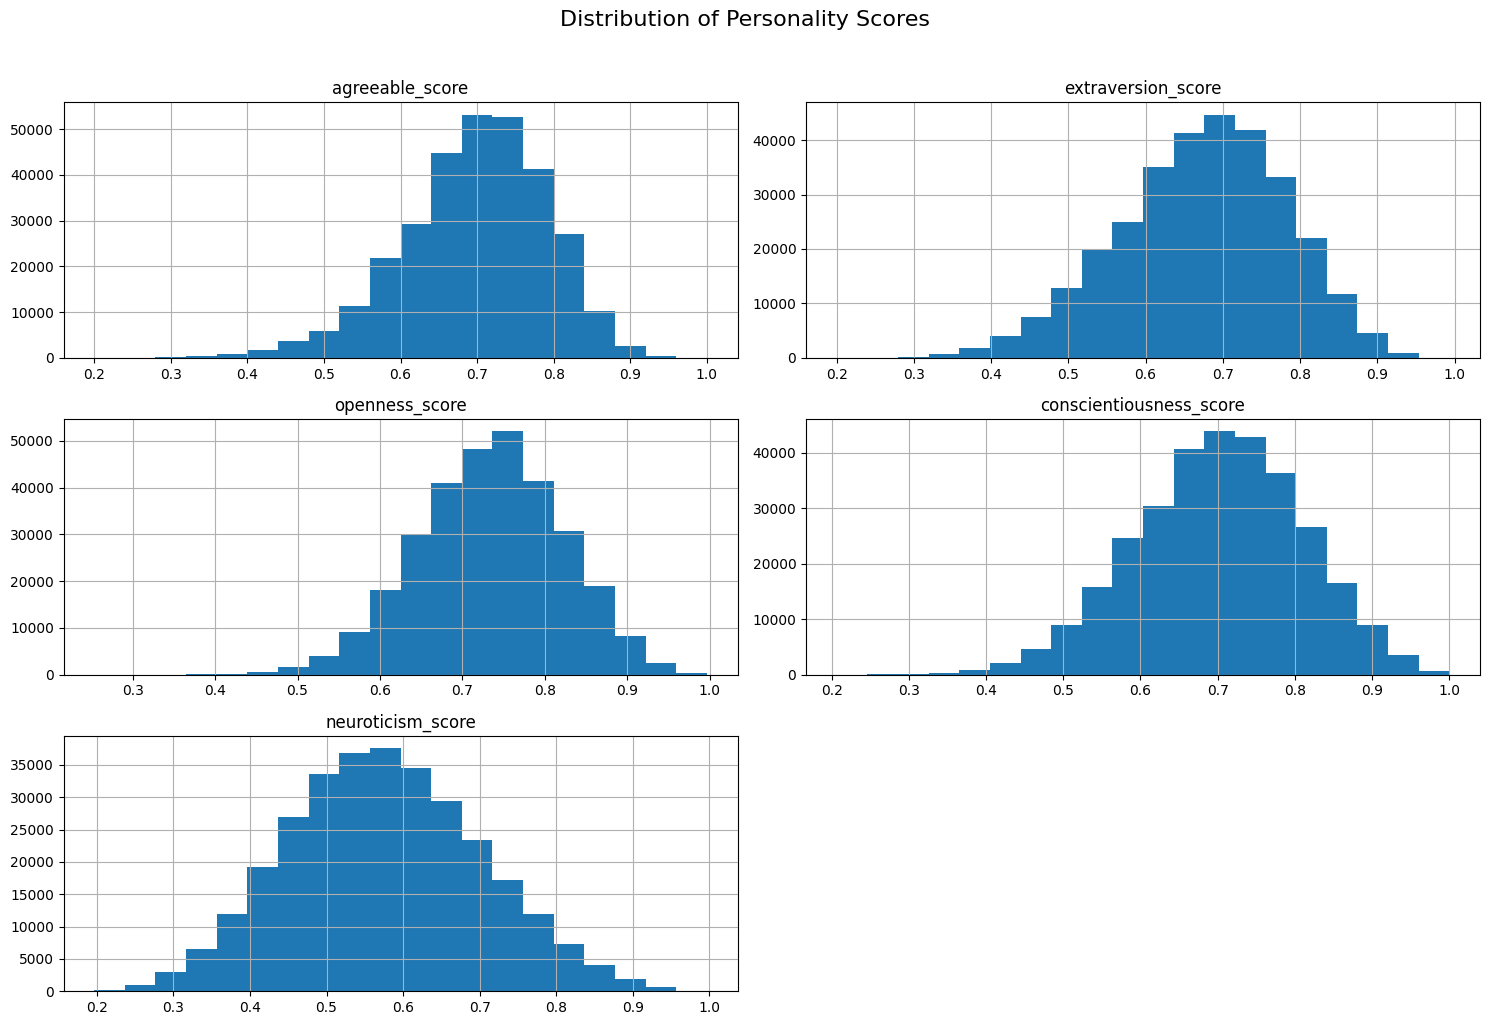

,agreeable_score,extraversion_score,openness_score,conscientiousness_score,neuroticism_score
count,307313.000000,307313.000000,307313.000000,307313.000000,307313.000000
mean,0.696807,0.672329,0.733941,0.701998,0.574399
std,0.093562,0.108680,0.087609,0.107378,0.125749
min,0.200000,0.200000,0.253333,0.206667,0.196667
25%,0.640000,0.600000,0.673333,0.630000,0.486667
50%,0.703333,0.680000,0.736667,0.706667,0.570000
75%,0.763333,0.750000,0.796667,0.776667,0.660000
max,1.000000,0.993333,0.996667,1.000000,0.996667


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

score_columns = ['agreeable_score', 'extraversion_score', 'openness_score', 'conscientiousness_score', 'neuroticism_score']

# Plot histograms for each score
big_five_df[score_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Personality Scores', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Display descriptive statistics for the scores
display(big_five_df[score_columns].describe())

In [ ]:
# Analyze score distribution across countries
country_scores = big_five_df.groupby('country')[score_columns].mean().reset_index()

# Display mean scores for a few countries
print("Mean Personality Scores by Country:")
# display(country_scores.head(10))
display(country_scores)

# Visualize score distributions for a few top countries (by number of respondents)
top_countries = big_five_df['country'].value_counts().nlargest(5).index.tolist()

plt.figure(figsize=(18, 10))
for i, country in enumerate(top_countries):
    plt.subplot(2, 3, i + 1)
    country_df = big_five_df[big_five_df['country'] == country]
    country_df[score_columns].hist(bins=20, ax=plt.gca())
    plt.title(f'Score Distribution in {country}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Mean Personality Scores by Country:


Based on the EDA, the score distributions appear relatively consistent across the top countries. There are missing values in the 'country' column, but the score columns themselves are complete. Given the goal is a general personality model, training PCA on the entire dataset seems appropriate to capture overall variance. If country-specific differences were more pronounced or a country-specific model was needed, a stratified approach or training on individual countries might be considered.

Therefore, train the PCA model on the entire dataset's score columns, update the `pca_evaluator` to use this new model, and then modify the mock test and compatibility functions to use the updated model.



In [ ]:
from sklearn.decomposition import PCA
import tensorflow as tf
import numpy as np

# Drop rows with missing country information if we were to use country for training strategy,
# but since we are using the entire dataset, we don't need to drop based on country for PCA training.
# However, we should handle potential NaNs in score columns if they existed.
# From df.info(), score columns have no NaNs.

# Select the score columns for PCA training
score_columns = ['agreeable_score', 'extraversion_score', 'openness_score', 'conscientiousness_score', 'neuroticism_score']
scores_data = big_five_df[score_columns]

# Train PCA on the entire dataset with different numbers of components
n_components_2d = 2
pca_2d = PCA(n_components=n_components_2d)
pca_2d.fit(scores_data)
trained_pca_model_2d = pca_2d # Store the 2D model

n_components_3d = 3
pca_3d = PCA(n_components=n_components_3d)
pca_3d.fit(scores_data)
trained_pca_model_3d = pca_3d # Store the 3D model

n_components_4d = 4
pca_4d = PCA(n_components=n_components_4d)
pca_4d.fit(scores_data)
trained_pca_model_4d = pca_4d # Store the 4D model


print("PCA models trained on the entire dataset with 2, 3, and 4 components.")

# Compare explained variance ratios
print("\nExplained Variance Ratio by Component:")
print(f"2D PCA: {pca_2d.explained_variance_ratio_}")
print(f"3D PCA: {pca_3d.explained_variance_ratio_}")
print(f"4D PCA: {pca_4d.explained_variance_ratio_}")

print("\nTotal Explained Variance:")
print(f"2D PCA: {np.sum(pca_2d.explained_variance_ratio_):.4f}")
print(f"3D PCA: {np.sum(pca_3d.explained_variance_ratio_):.4f}")
print(f"4D PCA: {np.sum(pca_4d.explained_variance_ratio_):.4f}")


# Update the pca_evaluator model (TensorFlow Keras model) for the 2D case for now,
# as the user asked for comparison of explained variance first.
# We can create TFLite models for 3D and 4D later if needed.

# Function to create and export TFLite model for a given PCA model
def export_pca_to_tflite(pca_model, n_components, model_name):
    mean = pca_model.mean_
    components = pca_model.components_

    # Create a simple Keras model that replicates PCA's transform
    pca_evaluator_model = tf.keras.Sequential([
        # Layer to subtract the mean
        tf.keras.layers.Lambda(lambda x: x - mean.astype(np.float32), input_shape=(len(score_columns),), dtype=tf.float32),
        # Layer to perform matrix multiplication with the components transpose
        tf.keras.layers.Dense(units=n_components, use_bias=False, dtype=tf.float32)
    ])

    # Set the weights of the Dense layer to the transpose of the PCA components
    pca_evaluator_model.layers[1].set_weights([components.T.astype(np.float32)])

    # Display the model summary
    print(f"\n{model_name} Keras Model Summary:")
    pca_evaluator_model.summary()

    # Convert the Keras model to TFLite
    converter = tf.lite.TFLiteConverter.from_keras_model(pca_evaluator_model)
    tflite_model = converter.convert()

    # Export the TFLite model to a file
    tflite_model_path = f'{model_name}.tflite'
    with open(tflite_model_path, 'wb') as f:
        f.write(tflite_model)

    print(f"\n{model_name} TFLite model saved to: {tflite_model_path}")

# Export 2D PCA model
export_pca_to_tflite(trained_pca_model_2d, n_components_2d, 'pca_evaluator_2d')

# Export 3D PCA model
export_pca_to_tflite(trained_pca_model_3d, n_components_3d, 'pca_evaluator_3d')

# Export 4D PCA model
export_pca_to_tflite(trained_pca_model_4d, n_components_4d, 'pca_evaluator_4d')


PCA models trained on the entire dataset with 2, 3, and 4 components.

Explained Variance Ratio by Component:
2D PCA: [0.43329437 0.20376232]
3D PCA: [0.43329437 0.20376232 0.16518038]
4D PCA: [0.43329437 0.20376232 0.16518038 0.10323896]

Total Explained Variance:
2D PCA: 0.6371
3D PCA: 0.8022
4D PCA: 0.9055

pca_evaluator_2d Keras Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_3 (Lambda)               │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

Saved artifact at '/tmp/tmpm04vzmp7'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 5), dtype=tf.float32, name='keras_tensor_15')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  133381798022608: TensorSpec(shape=(), dtype=tf.resource, name=None)

pca_evaluator_2d TFLite model saved to: pca_evaluator_2d.tflite

pca_evaluator_3d Keras Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_4 (Lambda)               │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

Saved artifact at '/tmp/tmp32m9fcpx'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 5), dtype=tf.float32, name='keras_tensor_20')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  133381798023952: TensorSpec(shape=(), dtype=tf.resource, name=None)

pca_evaluator_3d TFLite model saved to: pca_evaluator_3d.tflite

pca_evaluator_4d Keras Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_5 (Lambda)               │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

Saved artifact at '/tmp/tmpjmq3vhbw'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 5), dtype=tf.float32, name='keras_tensor_25')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  133381798031824: TensorSpec(shape=(), dtype=tf.resource, name=None)

pca_evaluator_4d TFLite model saved to: pca_evaluator_4d.tflite


## Interactive test

In [ ]:
from ipywidgets import FloatSlider, Button, VBox, HBox, Layout, Label
from IPython.display import display
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Ensure trained_pca_model_2d, trained_pca_model_3d, and trained_pca_model_4d
# are available from previous steps. If not, the relevant previous cells need to be run first.

def display_personality_compatibility_test():
    """
    Displays an interactive UI for users to input personality scores (0-1 scaled)
    for two individuals and calculates their PCA values (2D, 3D, 4D) and
    compatibility scores using different metrics.
    """
    print("--- Enter Personality Scores for User 1 (Scaled 0-1) ---")

    user1_extraversion = FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Extraversion:', layout=Layout(width='auto', indent='0px'))
    user1_agreeableness = FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Agreeableness:', layout=Layout(width='auto', indent='0px'))
    user1_conscientiousness = FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Conscientiousness:', layout=Layout(width='auto', indent='0px'))
    user1_emotional_stability = FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Emotional Stability:', layout=Layout(width='auto', indent='0px'))
    user1_intellect_imagination = FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Intellect/Imagination:', layout=Layout(width='auto', indent='0px'))

    user1_inputs = VBox([user1_extraversion, user1_agreeableness, user1_conscientiousness, user1_emotional_stability, user1_intellect_imagination])
    display(user1_inputs)


    # Create input forms for User 2
    print("\n--- Enter Personality Scores for User 2 (Scaled 0-1) ---")

    user2_extraversion = FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Extraversion:', layout=Layout(width='auto', indent='0px'))
    user2_agreeableness = FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Agreeableness:', layout=Layout(width='auto', indent='0px'))
    user2_conscientiousness = FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Conscientiousness:', layout=Layout(width='auto', indent='0px'))
    user2_emotional_stability = FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Emotional Stability:', layout=Layout(width='auto', indent='0px'))
    user2_intellect_imagination = FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Intellect/Imagination:', layout=Layout(width='auto', indent='0px'))

    user2_inputs = VBox([user2_extraversion, user2_agreeableness, user2_conscientiousness, user2_emotional_stability, user2_intellect_imagination])
    display(user2_inputs)

    # Add a button to trigger calculation
    calculate_button = Button(description="Calculate PCA and Compatibility")
    display(calculate_button)

    def on_calculate_button_clicked(b):
        # Get the entered scores
        user1_scores_5d = np.array([[
            user1_extraversion.value,
            user1_agreeableness.value,
            user1_conscientiousness.value,
            user1_emotional_stability.value,
            user1_intellect_imagination.value
        ]])

        user2_scores_5d = np.array([[
            user2_extraversion.value,
            user2_agreeableness.value,
            user2_conscientiousness.value,
            user2_emotional_stability.value,
            user2_intellect_imagination.value
        ]])

        print("\n--- Calculating Results ---")

        # Calculate PCA values for 2D, 3D, and 4D
        try:
            # Ensure the input to transform is float32 if the model expects it
            user1_pca_2d = trained_pca_model_2d.transform(user1_scores_5d.astype(np.float64)) # PCA expects float64
            user2_pca_2d = trained_pca_model_2d.transform(user2_scores_5d.astype(np.float64))

            user1_pca_3d = trained_pca_model_3d.transform(user1_scores_5d.astype(np.float64)) # PCA expects float64
            user2_pca_3d = trained_pca_model_3d.transform(user2_scores_5d.astype(np.float64))

            user1_pca_4d = trained_pca_model_4d.transform(user1_scores_5d.astype(np.float64)) # PCA expects float64
            user2_pca_4d = trained_pca_model_4d.transform(user2_scores_5d.astype(np.float64))


            print("User 1 2D PCA Values:")
            print(user1_pca_2d)
            print("\nUser 2 2D PCA Values:")
            print(user2_pca_2d)

            print("\nUser 1 3D PCA Values:")
            print(user1_pca_3d)
            print("\nUser 2 3D PCA Values:")
            print(user2_pca_3d)


            print("\nUser 1 4D PCA Values:")
            print(user1_pca_4d)
            print("\nUser 2 4D PCA Values:")
            print(user2_pca_4d)


            # --- Compare using Different Methods and Dimensions ---

            print("\n--- Compatibility Results ---")

            # 2D PCA Comparisons
            compatibility_pca_2d_cosine = cosine_similarity(user1_pca_2d, user2_pca_2d)[0][0]
            compatibility_pca_2d_cosine_scaled = ((compatibility_pca_2d_cosine + 1) / 2) * 9 + 1
            print(f"2D PCA Cosine Similarity (scaled 1-10): {compatibility_pca_2d_cosine_scaled:.2f}")

            euclidean_distance_pca_2d = np.linalg.norm(user1_pca_2d - user2_pca_2d)
            max_pca_distance_estimate_2d = 1.5 # Estimate based on observed range
            similarity_pca_2d_euclidean = 1 - (euclidean_distance_pca_2d / max_pca_distance_estimate_2d)
            similarity_pca_2d_euclidean = max(0, similarity_pca_2d_euclidean)
            compatibility_pca_2d_euclidean_scaled = similarity_pca_2d_euclidean * 9 + 1
            print(f"2D PCA Euclidean Distance (scaled 1-10 - conceptual): {compatibility_pca_2d_euclidean_scaled:.2f}")


            # 3D PCA Comparisons
            compatibility_pca_3d_cosine = cosine_similarity(user1_pca_3d, user2_pca_3d)[0][0]
            compatibility_pca_3d_cosine_scaled = ((compatibility_pca_3d_cosine + 1) / 2) * 9 + 1
            print(f"3D PCA Cosine Similarity (scaled 1-10): {compatibility_pca_3d_cosine_scaled:.2f}")

            euclidean_distance_pca_3d = np.linalg.norm(user1_pca_3d - user2_pca_3d)
            max_pca_distance_estimate_3d = 2.0 # Estimate (between 2D and 4D)
            similarity_pca_3d_euclidean = 1 - (euclidean_distance_pca_3d / max_pca_distance_estimate_3d)
            similarity_pca_3d_euclidean = max(0, similarity_pca_3d_euclidean)
            compatibility_pca_3d_euclidean_scaled = similarity_pca_3d_euclidean * 9 + 1
            print(f"3D PCA Euclidean Distance (scaled 1-10 - conceptual): {compatibility_pca_3d_euclidean_scaled:.2f}")


            # 4D PCA Comparisons
            compatibility_pca_4d_cosine = cosine_similarity(user1_pca_4d, user2_pca_4d)[0][0]
            compatibility_pca_4d_cosine_scaled = ((compatibility_pca_4d_cosine + 1) / 2) * 9 + 1
            print(f"4D PCA Cosine Similarity (scaled 1-10): {compatibility_pca_4d_cosine_scaled:.2f}")

            euclidean_distance_pca_4d = np.linalg.norm(user1_pca_4d - user2_pca_4d)
            max_pca_distance_estimate_4d = 2.5 # Estimate
            similarity_pca_4d_euclidean = 1 - (euclidean_distance_pca_4d / max_pca_distance_estimate_4d) # Corrected variable name here
            similarity_pca_4d_euclidean = max(0, similarity_pca_4d_euclidean) # Corrected variable name here
            compatibility_pca_4d_euclidean_scaled = similarity_pca_4d_euclidean * 9 + 1 # Corrected variable name here
            print(f"4D PCA Euclidean Distance (scaled 1-10 - conceptual): {compatibility_pca_4d_euclidean_scaled:.2f}")


            # 5D Original Comparisons
            compatibility_5d_cosine = cosine_similarity(user1_scores_5d, user2_scores_5d)[0][0]
            compatibility_5d_cosine_scaled = ((compatibility_5d_cosine + 1) / 2) * 9 + 1
            print(f"5D Original Cosine Similarity (scaled 1-10): {compatibility_5d_cosine_scaled:.2f}")

            euclidean_distance_5d = np.linalg.norm(user1_scores_5d - user2_scores_5d)
            max_5d_distance_estimate = 2.5 # Estimate
            similarity_5d_euclidean = 1 - (euclidean_distance_5d / max_5d_distance_estimate)
            similarity_5d_euclidean = max(0, similarity_5d_euclidean)
            compatibility_5d_euclidean_scaled = similarity_5d_euclidean * 9 + 1
            print(f"5D Original Euclidean Distance (scaled 1-10 - conceptual): {compatibility_5d_euclidean_scaled:.2f}")


        except Exception as e:
            print(f"An error occurred during calculation: {e}")
            print("Please ensure trained_pca_model_2d, trained_pca_model_3d, and trained_pca_model_4d are correctly trained and available.")


    # Link the button to the calculation function
    calculate_button.on_click(on_calculate_button_clicked)

    print("\nAdjust the sliders above and click 'Calculate PCA and Compatibility'.")

display_personality_compatibility_test()


--- Enter Personality Scores for User 1 (Scaled 0-1) ---



--- Enter Personality Scores for User 2 (Scaled 0-1) ---


Button(description='Calculate PCA and Compatibility', style=ButtonStyle())


Adjust the sliders above and click 'Calculate PCA and Compatibility'.


In [ ]:
import json
import numpy as np

# Ensure trained_pca_model_4d is available from previous steps
# If not, the relevant previous cells need to be run first.

# Extract the mean vector and component matrix from the trained PCA model
pca_mean = trained_pca_model_4d.mean_  # Mean vector
pca_components = trained_pca_model_4d.components_ # Component matrix (n_components, n_features)

# Convert NumPy arrays to lists for JSON serialization
pca_params = {
    "mean": pca_mean.tolist(),
    "components": pca_components.tolist()
}

# Export to JSON
json_output = json.dumps(pca_params, indent=4)
print(json_output)

# Optionally, save to a file
with open('pca_parameters_4d.json', 'w') as f:
    f.write(json_output)
print("\nPCA parameters saved to pca_parameters_4d.json")

{
    "mean": [
        0.6968074677391889,
        0.6723287115524996,
        0.7339413345134549,
        0.7019984402438775,
        0.574399184761682
    ],
    "components": [
        [
            -0.2180412943906895,
            -0.4394034997412539,
            -0.08520712181270074,
            -0.47711527324537323,
            0.724212207011149
        ],
        [
            -0.3117689149624214,
            0.6759383122168042,
            0.3775570625284317,
            -0.5507753052872655,
            -0.00218388673574868
        ],
        [
            0.714593176383529,
            0.055294593280118265,
            0.5917022377547896,
            0.06753540151161957,
            0.3628037094610858
        ],
        [
            -0.13712625316926405,
            0.5289535935768106,
            -0.3017073400631589,
            0.5176376086048503,
            0.5851738832550566
        ]
    ]
}

PCA parameters saved to pca_parameters_4d.json
